# K-Means Clustering

Given a data set $\{x_1, \ldots, x_N\}$ consisting of $N$ observations of a $D-$dimensional Euclidean variable, partition the data into $K$ clusters, a group of data points whoses inter-point distances are smaller than those between points in different clusters. These clusters can be represented by a set of $D$-dimensional 'prototype' vectors $\mu_k$ where $k = 1, \ldots, K$; the prototype clusters represent the centers of the clusters. 

The goal of the K-means algorithm is to find a set of prototype vectors that minimize the sum of the squares distance between each data point and the nearest prototype vector. 

For each data point, $x_n$, we introduce a set of binary indicator variables $r_{nk} \in \{0, 1\}$ where $k = 1, \ldots, K$ which indicate which of the $K$ clusters the $n$th data point belongs to: if the data point belongs to the $k$th cluster, then $r_{nk} = 1$ and $r_{nk} = 0$ for $j \neq k$. This is known sometimes as a 1-of-$K$ coding scheme. The error function is then defined as:

\begin{equation}
J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||x_n - \mu_k||^2
\end{equation}

Firstly, some initial values for the clusters are chosen and the $J$ is minimised with respect to the indicator variables $r_{nk}$, keeping $\mu_k$ fixed. This is refered to as the expectation ($E$) step.

\begin{equation}
r_{nk} = \begin{cases} 
1 & \text{if } k = \text{argmin}_j ||x_n - \mu_j||^2 \\
0 & \text{otherwise}
\end{cases}
\end{equation}

This effectively assignment to the closest cluster. More formally, as $J$ is a linear function of the $\{ r_{nk} \}$, this optimization can performed to give a closed form solution. As the terms involving different $n$ are independent, each $n$ can be optimized independently by choosing $r_{nk} = 1$  for which value of $k$ minimizes $||x_n - \mu_k||^2$.

 In the second step ($M$), $J$ is minimised with respect to $\{ \mu_k \}$ with the $r_{nk}$ fixed. The objective function $J$ is a quadratic function of $\mu_k$ and it can be minimzed by setting its derivative with respect to $\mu_k$ to zero: 

 \begin{equation}
2 \sum_{n=1}^N r_{nk} (x_n - \mu_k) = 0
 \end{equation}

which can be easily solved for $\mu_k$ to give:

\begin{equation}
\mu_k = \frac{\sum_{n=1}^N r_{nk} x_n}{\sum_{n=1}^N r_{nk}}
\end{equation}

This can be interpreted as the mean of the data points in the $k$ th cluster. 
 
These two steps are iterated until convergence is reached



In [179]:
# Example - generating data

import torch 
from torch.distributions import MultivariateNormal
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Generate some data
torch.manual_seed(42)

cluster_1 = MultivariateNormal(torch.tensor([[0., 0.]]), torch.tensor([[.5, 0.], [0., .5]])).sample((20,)).squeeze(1)
cluster_2 = MultivariateNormal(torch.tensor([[5., 5.]]), torch.tensor([[.5, 0.], [0., .5]])).sample((20,)).squeeze(1)
cluster_3 = MultivariateNormal(torch.tensor([[-5., -3.]]), torch.tensor([[.5, 0.], [0., .5]])).sample((20,)).squeeze(1)
data = torch.cat([cluster_1, cluster_2, cluster_3], dim=0)

Iteration 1
--------


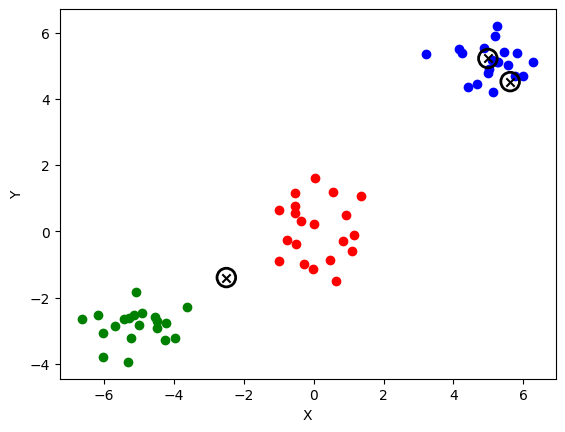

Iteration 2
--------


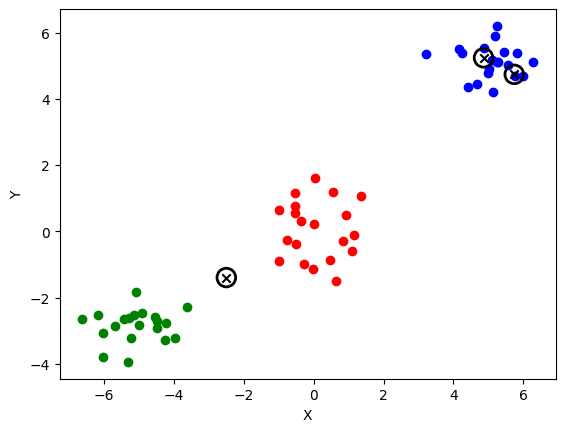

Iteration 3
--------


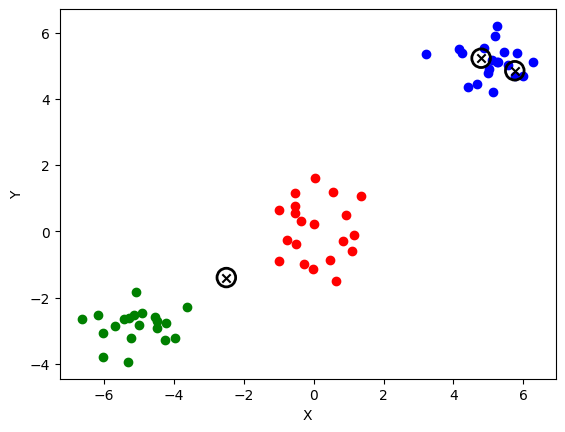

Iteration 4
--------


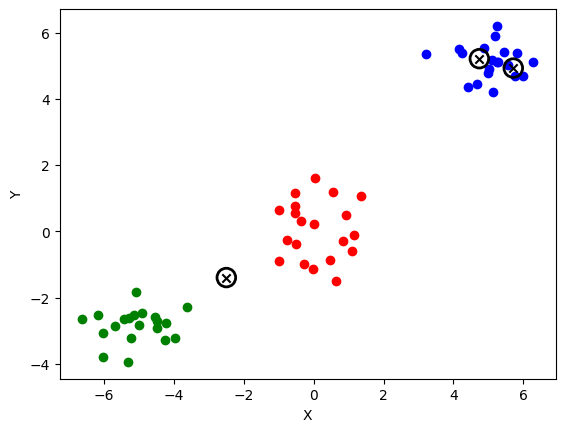

Iteration 5
--------


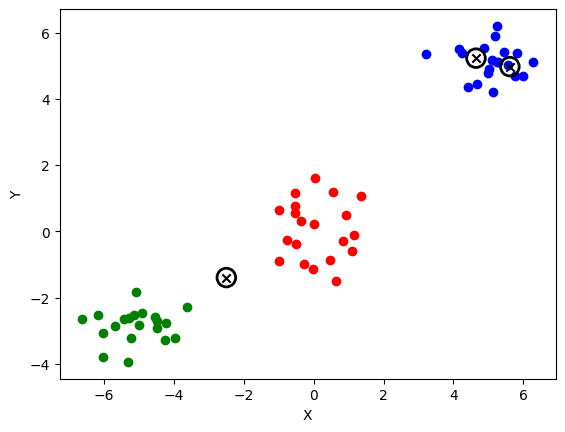

In [197]:
K = 3 # Number of clusters

# choose random centroids 
mu_k = torch.randint(low=-10, high=10, size=(K, 2)) # Initialise cluster selection

for i in range(5):
    # E-step 
    distances = (data.unsqueeze(1) - mu_k.unsqueeze(0).repeat(data.shape[0], 1, 1)).pow(2).sum(dim=-1) # distances to clusters
    r_k = torch.argmin(distances, dim=-1) # assign data points to clusters
    r_k = F.one_hot(r_k, num_classes=K).float()

    # M-step 
    mu_k = torch.sum(r_k.unsqueeze(-1).repeat(1, 1, 2) * data.unsqueeze(1).repeat(1, 3, 1), axis=0) / (r_k.sum(dim=0).unsqueeze(1).repeat(1, 2) + 1e-6)


    # Plot the results 
    print(f"Iteration {i + 1}")
    plt.figure()
    plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c="r")
    plt.scatter(cluster_2[:, 0], cluster_2[:, 1], c="b")
    plt.scatter(cluster_3[:, 0], cluster_3[:, 1], c="g")

    plt.scatter(mu_k[:, 0], mu_k[:, 1], c="k", marker="x")
    plt.scatter(mu_k[:, 0], mu_k[:, 1], c="none", edgecolors="k", s=180, linewidths=2)
    plt.xlabel("X")
    plt.ylabel("Y")
    print("--------")
    plt.show()
